In [206]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ztest
import math
import scipy
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

%matplotlib inline

In [165]:
stats.norm(0,1).cdf(2)

0.9772498680518208

In [166]:
stats.norm(0,1).pdf(2)

0.05399096651318806

In [244]:
stats.norm(0,1).ppf(0.975)*(30)

58.79891953620162

In [168]:
path = "Data\housing.csv"

In [169]:
data = pd.read_csv(path)
data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [170]:
sample_size = 100
z_critical = stats.norm.ppf(0.975)
z_critical

1.959963984540054

In [171]:
data_sample = data.sample(n=sample_size, random_state=0)
data_sample.shape

(100, 82)

In [172]:
sample_mean = data_sample.SalePrice.mean()
population_std = data.SalePrice.std()
margin_of_error = z_critical * (population_std/(sample_size**0.5))
confidence_interval = [sample_mean-margin_of_error, sample_mean+margin_of_error]
true_mean = data.SalePrice.mean()

In [173]:
print(sample_mean, true_mean)

183765.44 180796.0600682594


In [174]:
1.96 * (10/(200**0.5))

1.385929291125633

In [175]:
z_statistic, p_value = ztest(data['Lot.Area'], value=1200, alternative="smaller")
print(z_statistic, p_value)

61.46512878748129 1.0


In [176]:
inference = 'Accept' if p_value>0.05 else 'Reject'
inference

'Accept'

In [177]:
family = data[data["Sale.Condition"] == 'Family']['SalePrice']
alloca = data[data["Sale.Condition"] == 'Alloca']['SalePrice']

In [178]:
t_stat, p_value = stats.ttest_ind(family, alloca)
print(t_stat, p_value)

-0.2600957325150498 0.7955758684627909


In [179]:
inference = 'Accept' if p_value>0.05 else 'Reject'
inference

'Accept'

In [180]:
dfob = pd.DataFrame(data = [[60,54,46,41],[40,44,53,57]])
dfex = pd.DataFrame(data = [[50.886,49.868,50.377,49.868],[49.114,48.132,48.623,48.132]])
(((dfob-dfex)**2)/dfex).sum().sum()

8.0059071211091

In [181]:
dfob1 = pd.DataFrame(data = [[41,19,24,16]])
dfob1

,0,1,2,3
0,41,19,24,16


In [182]:
chi2, p, dof, ex = stats.chi2_contingency(dfob1)

print("Chi-square statistic = ",chi2)
print("p-value = ",p)

Chi-square statistic =  0.0
p-value =  1.0


In [183]:
18/7.5

2.4

## Assignment | Confidence Interval

In [184]:
path = "Data\cleaned_loan_data.csv"

In [185]:
sample_size=2000
z_critical = stats.norm.ppf(q = 0.95)  

In [186]:
data = pd.read_csv(path)
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [187]:
data_sample = data.sample(n=sample_size, random_state=0)

In [188]:
sample_mean = data_sample.installment.mean()
sample_std = data_sample.installment.std()

In [189]:
margin_of_error = z_critical * (sample_std/(sample_size**0.5))
margin_of_error

7.637373299879691

In [190]:
confidence_interval = [sample_mean-margin_of_error, sample_mean+margin_of_error]
confidence_interval

[309.97359170012027, 325.24833829987966]

In [191]:
true_mean = data.installment.mean()
true_mean

319.08941323867265

In [192]:
(true_mean>=confidence_interval[0]) & (true_mean<=confidence_interval[1])

True

## Assignment | CLT

In [193]:
sample_size=np.array([20,50,100])

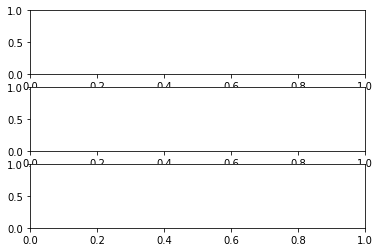

In [194]:
fig, ax = plt.subplots(3,1)

In [195]:
for i in range(len(sample_size)):
    m=[]
    for j in range(10000):
        m.append(data.sample(sample_size[i])['installment'].mean())
    mean_series = pd.Series(m)
    mean_series.plot(kind='hist', ax=ax[i])

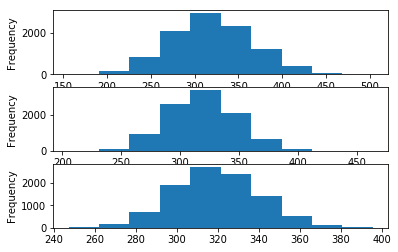

In [196]:
fig

## Assignment | ztest

In [197]:
data['int.rate'] = data['int.rate'].apply(lambda x:float(x[:-1]))

In [198]:
data['int.rate'] = data['int.rate']/100

In [199]:
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [200]:
z_statistic, p_value = ztest(data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

In [201]:
print(z_statistic, p_value)

12.321276240201554 3.479213190639132e-35


In [202]:
inference = 'Accept' if p_value>0.05 else 'Reject'
inference

'Reject'

## Assignment | Installment vs Loan Defaulting

In [204]:
z_statistic, p_value = ztest(data[data['paid.back.loan']=='No']['installment'], data[data['paid.back.loan']=='Yes']['installment'])
print(z_statistic, p_value)

4.894575287952092 9.85182562491764e-07


In [205]:
inference = 'Accept' if p_value>0.05 else 'Reject'
inference

'Reject'

## Assignment | chi**2

In [240]:
critical_value = stats.chi2.ppf(q = 0.95, df = 6)

In [229]:
yes = data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no = data[data['paid.back.loan']=='No']['purpose'].value_counts()

In [222]:
observed = pd.concat([yes.transpose(), no.transpose()], axis=1, keys=['Yes', 'No'])
chi2, p, dof, ex = chi2_contingency(observed)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [238]:
inference = 'Reject' if chi2 > critical_value else 'Accept'
inference

'Reject'

In [241]:
critical_value

12.591587243743977